# Housing Prices Competition Exploratory Data Analysis and visualization

![](https://i.postimg.cc/q70nSfWK/Rising-house-prices.jpg)


In [1]:
"""
Python 3.10 Housing Prices Competition Exploratory Data Analysis and visualization program will you survive on the titanic or not
File name Housing_Prices_eda.py

Version: 0.1
Author: Andrej Marinchenko
Date: 2022-04-22
"""

# Importing Libraries
# visualization
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


# **Overview data competition 'Housing Prices Competition for Kaggle Learn Users'**



### Dataset Description
#### File descriptions
- `train.csv` - the training set
- `test.csv` - the test set
- `data_description.txt` - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- `sample_submission.csv` - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

#### Data fields
Here's a brief version of what you'll find in the data description file.

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* `MSSubClass`: The building class
* `MSZoning`: The general zoning classification
* `LotFrontage`: Linear feet of street connected to property
* `LotArea`: Lot size in square feet
* `Street`: Type of road access
* `Alley`: Type of alley access
* `LotShape`: General shape of property
* `LandContour`: Flatness of the property
* `Utilities`: Type of utilities available
* `LotConfig`: Lot configuration
* `LandSlope`: Slope of property
* `Neighborhood`: Physical locations within Ames city limits
* `Condition1`: Proximity to main road or railroad
* `Condition2`: Proximity to main road or railroad (if a second is present)
* `BldgType`: Type of dwelling
* `HouseStyle`: Style of dwelling
* `OverallQual`: Overall material and finish quality
* `OverallCond`: Overall condition rating
* `YearBuilt`: Original construction date
* `YearRemodAdd`: Remodel date
* `RoofStyle`: Type of roof
* `RoofMatl`: Roof material
* `Exterior1st`: Exterior covering on house
* `Exterior2nd`: Exterior covering on house (if more than one material)
* `MasVnrType`: Masonry veneer type
* `MasVnrArea`: Masonry veneer area in square feet
* `ExterQual`: Exterior material quality
* `ExterCond`: Present condition of the material on the exterior
* `Foundation`: Type of foundation
* `BsmtQual`: Height of the basement
* `BsmtCond`: General condition of the basement
* `BsmtExposure`: Walkout or garden level basement walls
* `BsmtFinType1`: Quality of basement finished area
* `BsmtFinSF1`: Type 1 finished square feet
* `BsmtFinType2`: Quality of second finished area (if present)
* `BsmtFinSF2`: Type 2 finished square feet
* `BsmtUnfSF`: Unfinished square feet of basement area
* `TotalBsmtSF`: Total square feet of basement area
* `Heating`: Type of heating
* `HeatingQC`: Heating quality and condition
* `CentralAir`: Central air conditioning
* `Electrical`: Electrical system
* `1stFlrSF`: First Floor square feet
* `2ndFlrSF`: Second floor square feet
* `LowQualFinSF`: Low quality finished square feet (all floors)
* `GrLivArea`: Above grade (ground) living area square feet
* `BsmtFullBath`: Basement full bathrooms
* `BsmtHalfBath`: Basement half bathrooms
* `FullBath`: Full bathrooms above grade
* `HalfBath`: Half baths above grade
* `Bedroom`: Number of bedrooms above basement level
* `Kitchen`: Number of kitchens
* `KitchenQual`: Kitchen quality
* `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
* `Functional`: Home functionality rating
* `Fireplaces`: Number of fireplaces
* `FireplaceQu`: Fireplace quality
* `GarageType`: Garage location
* `GarageYrBlt`: Year garage was built
* `GarageFinish`: Interior finish of the garage
* `GarageCars`: Size of garage in car capacity
* `GarageArea`: Size of garage in square feet
* `GarageQual`: Garage quality
* `GarageCond`: Garage condition
* `PavedDrive`: Paved driveway
* `WoodDeckSF`: Wood deck area in square feet
* `OpenPorchSF`: Open porch area in square feet
* `EnclosedPorch`: Enclosed porch area in square feet
* `3SsnPorch`: Three season porch area in square feet
* `ScreenPorch`: Screen porch area in square feet
* `PoolArea`: Pool area in square feet
* `PoolQC`: Pool quality
* `Fence`: Fence quality
* `MiscFeature`: Miscellaneous feature not covered in other categories
* `MiscVal`: $Value of miscellaneous feature
* `MoSold`: Month Sold
* `YrSold`: Year Sold
* `SaleType`: Type of sale
* `SaleCondition` : Condition of sale

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)


'''The Python Pandas packages helps us work with our datasets. 
We start by acquiring the training and testing datasets into Pandas DataFrames. 
We also combine these datasets to run certain operations on both datasets together.
'''

df_train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
df_test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
df_all = concat_df(df_train, df_test)
target = df_train.SalePrice
target_name = 'SalePrice'

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train[target_name].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe().T)
df_train.sample(5)

Number of Training Examples = 1460
Number of Test Examples = 1459

Training X Shape = (1460, 81)
Training y Shape = 1460

Test X Shape = (1459, 80)
Test y Shape = 1459

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1337,1338,30,RM,153.0,4118,Pave,Grvl,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,52500
794,795,60,RL,NaN,10832,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2008,WD,Normal,194500
1362,1363,50,RL,NaN,12513,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,104900
1315,1316,60,RL,85.0,11075,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,206900
1250,1251,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000


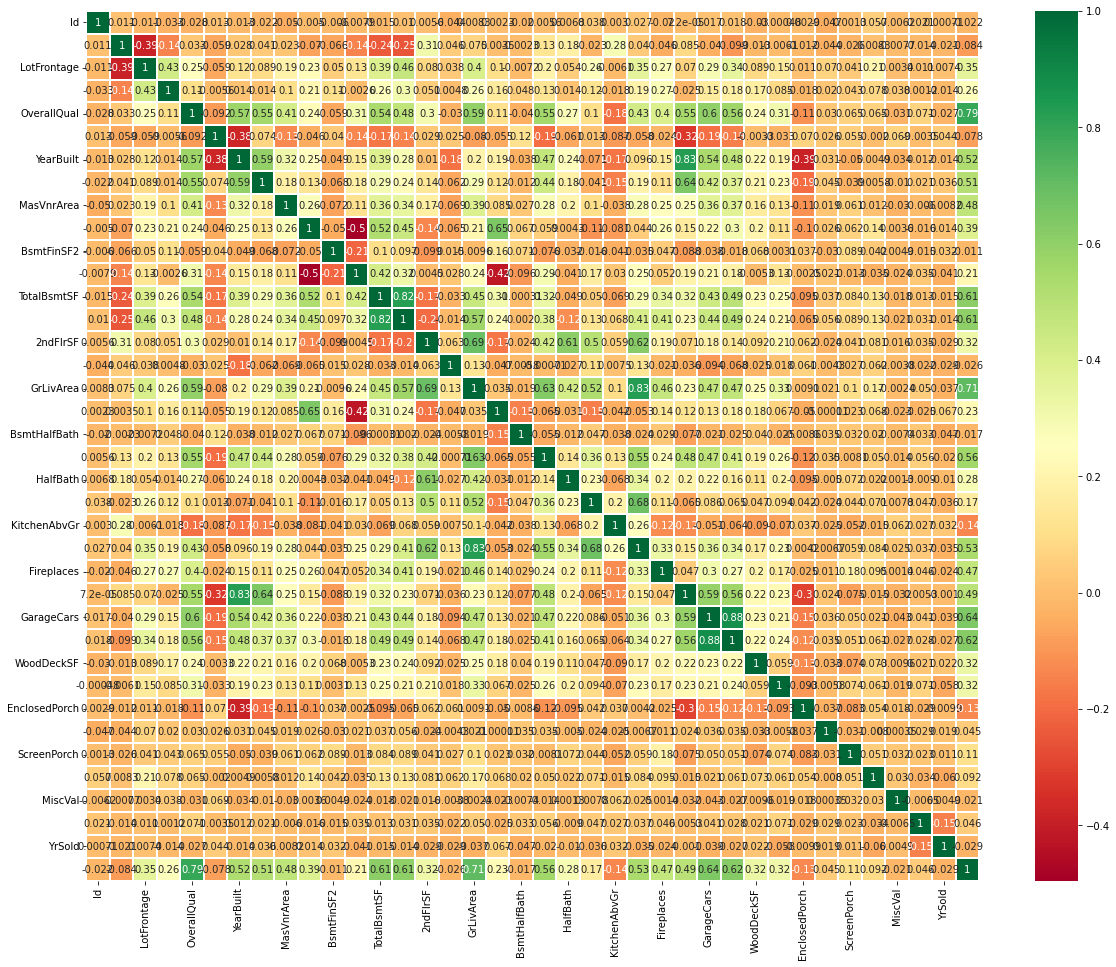

In [3]:
'''Correlation Between The Features'''
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show()

# Numerical columns

In [4]:
# List of numerical attributes
print('List of numerical attributes: \n', df_train.select_dtypes(exclude=['object']).columns)
print('Quantity of numerical attributes: ', len(df_train.select_dtypes(exclude='object').columns))
df_train.select_dtypes(exclude=['object']).describe().round(decimals=2)

List of numerical attributes: 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Quantity of numerical attributes:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


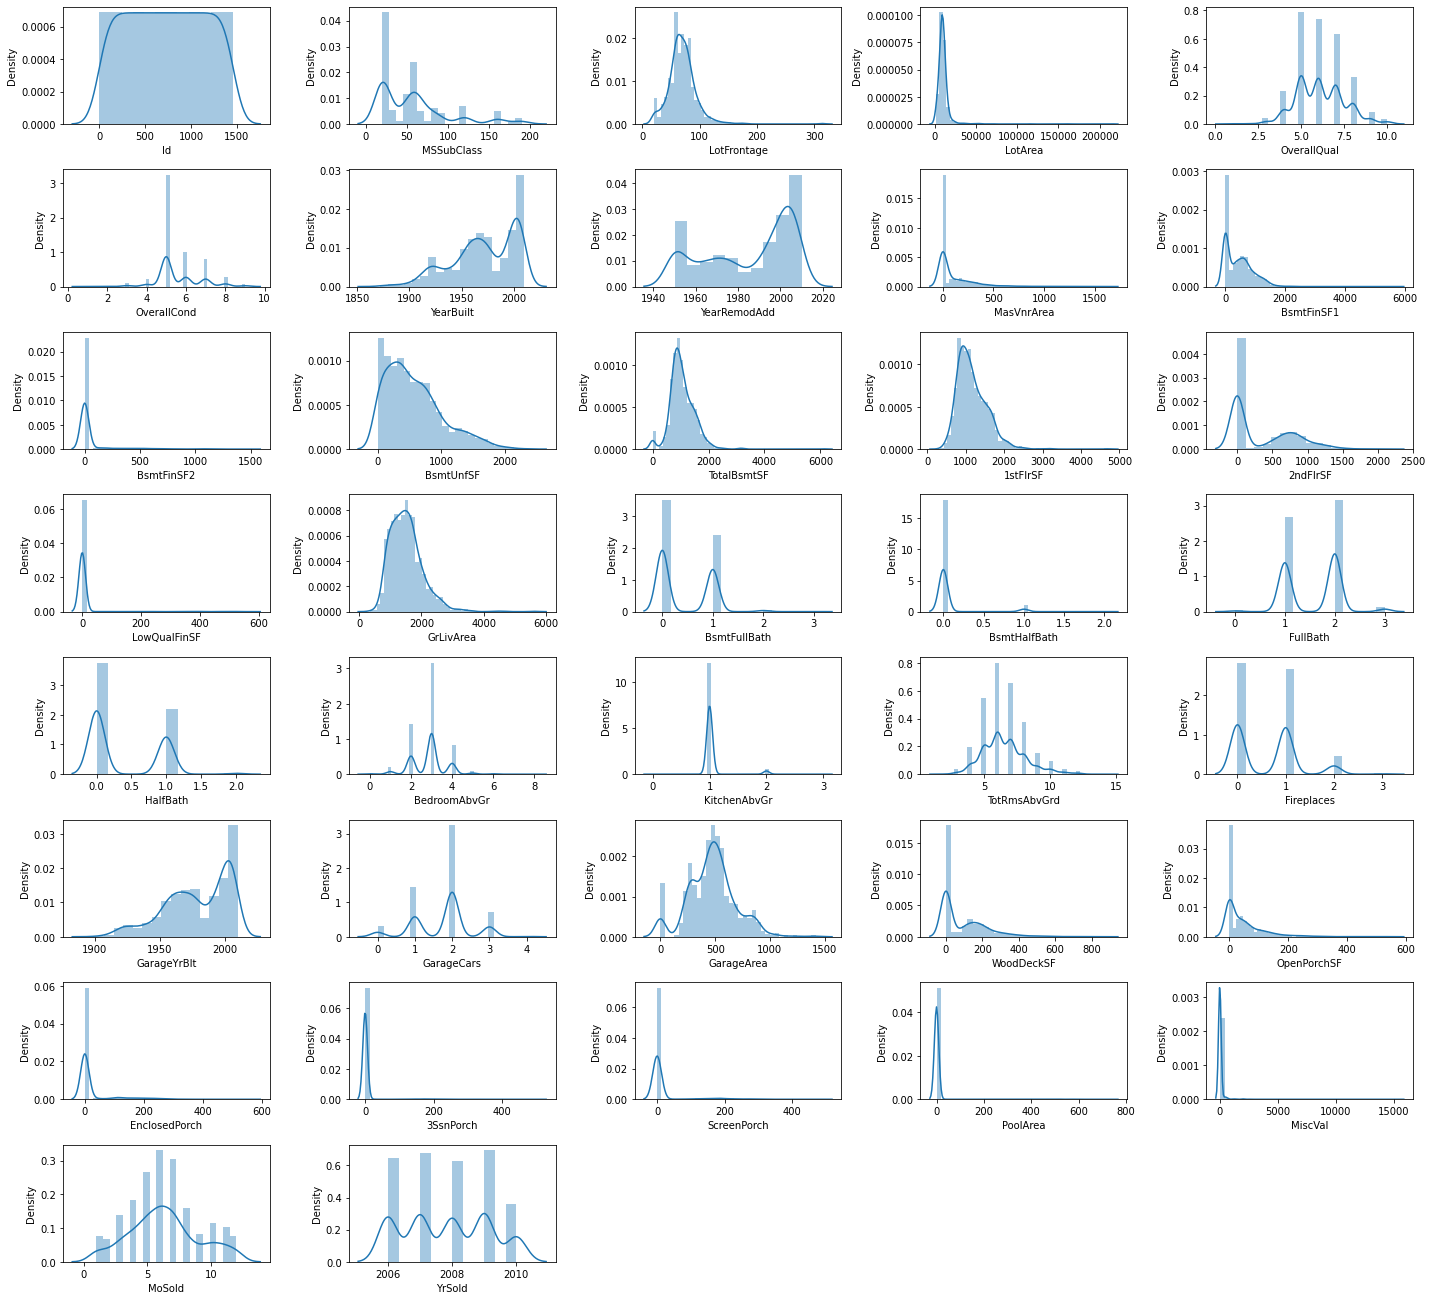

In [5]:
num_attributes = df_train.select_dtypes(exclude='object').drop(target_name, axis=1).copy()

fig = plt.figure(figsize=(20,20))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,5,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

# Categorical columns

In [6]:
# List of Categorical attributes
print('List of numerical attributes: \n', df_train.select_dtypes(include=['object']).columns)
print('Quantity of numerical attributes: ', len(df_train.select_dtypes(include='object').columns))
df_train.describe(include='object').T.sort_values(by=['unique'], ascending=False)

List of numerical attributes: 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Quantity of numerical attributes:  43


,count,unique,top,freq
Neighborhood,1460,25,NAmes,225
Exterior2nd,1460,16,VinylSd,504
Exterior1st,1460,15,VinylSd,515
SaleType,1460,9,WD,1267
Condition1,1460,9,Norm,1260
Condition2,1460,8,Norm,1445
HouseStyle,1460,8,1Story,726
RoofMatl,1460,8,CompShg,1434
Functional,1460,7,Typ,1360
BsmtFinType2,1422,6,Unf,1256


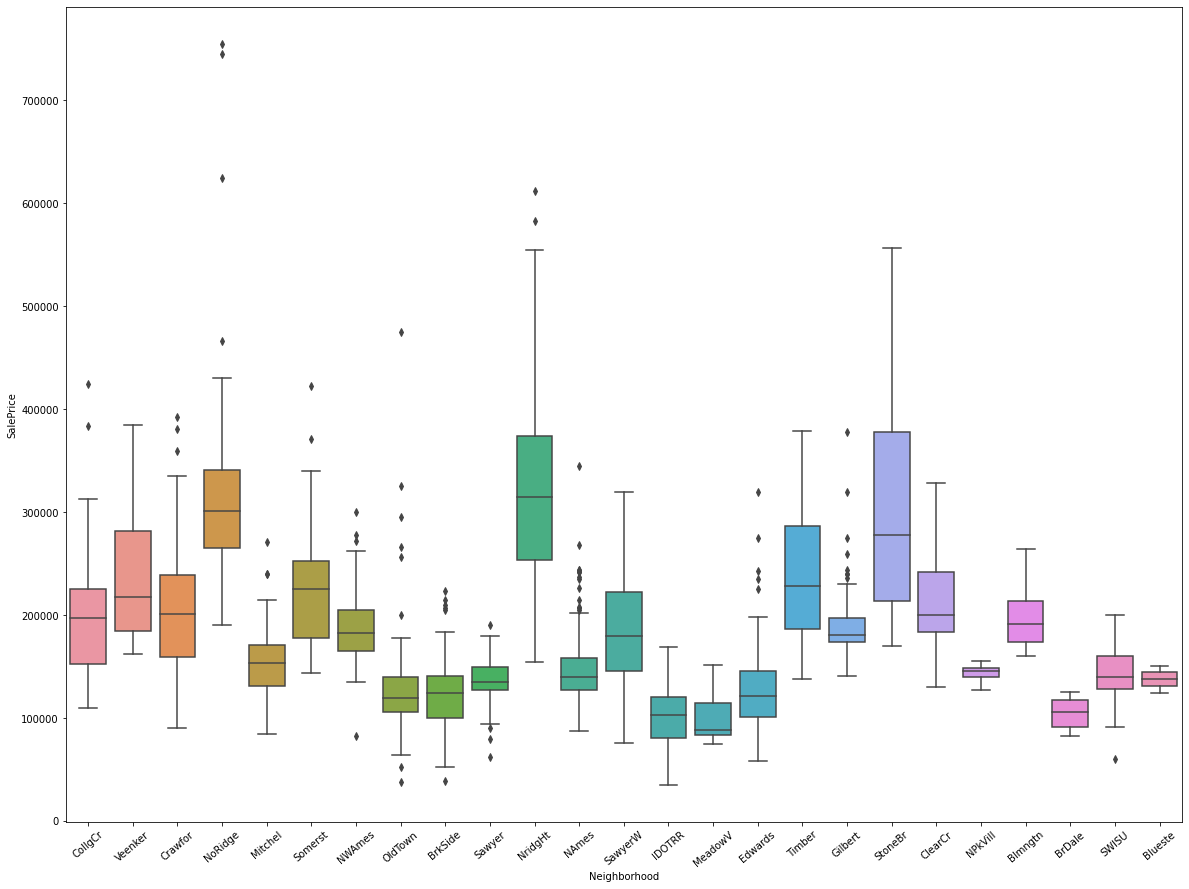

In [7]:
# Exploring categorical columns
f, ax = plt.subplots(figsize=(20,15))
sns.boxplot(y=target, x=df_train.Neighborhood)
plt.xticks(rotation=40)
plt.show()

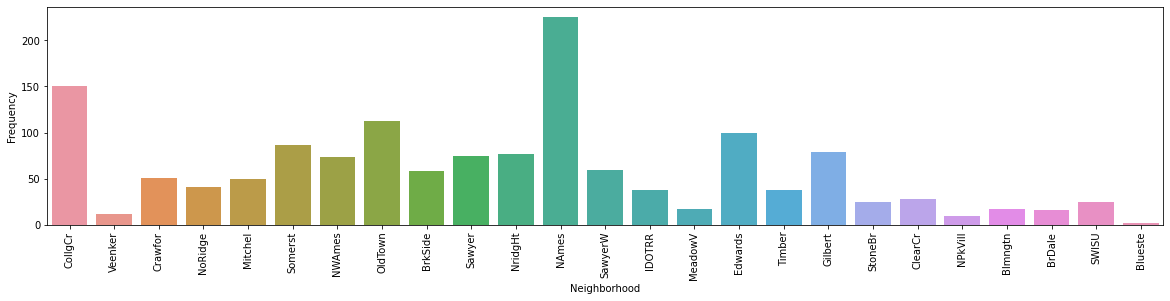

In [8]:
# Count of categories within Neighborhood attribute
fig = plt.figure(figsize=(20,4))
sns.countplot(x='Neighborhood', data=df_train)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

# Missing/null values 

In [9]:
def display_missing(df):    
    for col in df.columns.tolist():          
        if df[col].isnull().sum() != 0: print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
LotFrontage column missing values: 259
Alley column missing values: 1369
MasVnrType column missing values: 8
MasVnrArea column missing values: 8
BsmtQual column missing values: 37
BsmtCond column missing values: 37
BsmtExposure column missing values: 38
BsmtFinType1 column missing values: 37
BsmtFinType2 column missing values: 38
Electrical column missing values: 1
FireplaceQu column missing values: 690
GarageType column missing values: 81
GarageYrBlt column missing values: 81
GarageFinish column missing values: 81
GarageQual column missing values: 81
GarageCond column missing values: 81
PoolQC column missing values: 1453
Fence column missing values: 1179
MiscFeature column missing values: 1406


Test Set
MSZoning column missing values: 4
LotFrontage column missing values: 227
Alley column missing values: 1352
Utilities column missing values: 2
Exterior1st column missing values: 1
Exterior2nd column missing values: 1
MasVnrType column missing values: 16
MasVnrArea column m

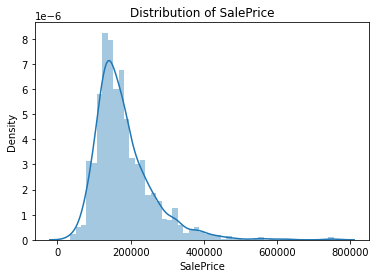

In [10]:
plt.figure()
sns.distplot(target)
plt.title('Distribution of '+ target_name)
plt.show()

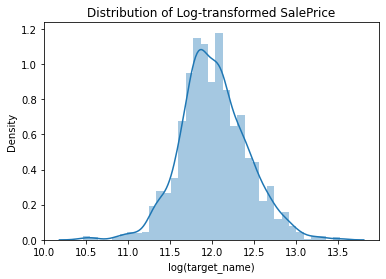

In [11]:
sns.distplot(np.log(target))
plt.title('Distribution of Log-transformed '+target_name)
plt.xlabel('log(target_name)')
plt.show()

In [12]:
print('Target data has a skew of ' + str(target.skew().round(decimals=2)) + 
      ' while the log-transformed target improves the skew to ' + 
      str(np.log(target).skew().round(decimals=2)))

Target data has a skew of 1.88 while the log-transformed target improves the skew to 0.12


# Finding Outliers

Visualisation of data may support the discovery of possible outliers within the data. Examples of how this can be done include:

Within univariate analysis, for example through using box plots. Outliers are observations more than a multiple (1.5-3) of the IQR (inter-quartile range) beyond the upper or lower quartile. (If data is skewed, it may be helpful to transform them first to a more symmetric distribution shape)
Within bivariate analysis, for example scatterplots. Outliers have y-values that are unusual in relation to other observations with similar x-values. Alternatively, plots of the residuals from fitted least square line of bivariate regression can also indicate outliers.
The consensus is that all outliers should be carefully examined:

Go back to original data to check for recording or transcription errors
If no such errors, look carefully for unusual features of the individual unit to explain difference. This may lead to new theory/discoveries
If data cannot be checked further, outlier is usually (often) dropped from the dataset.

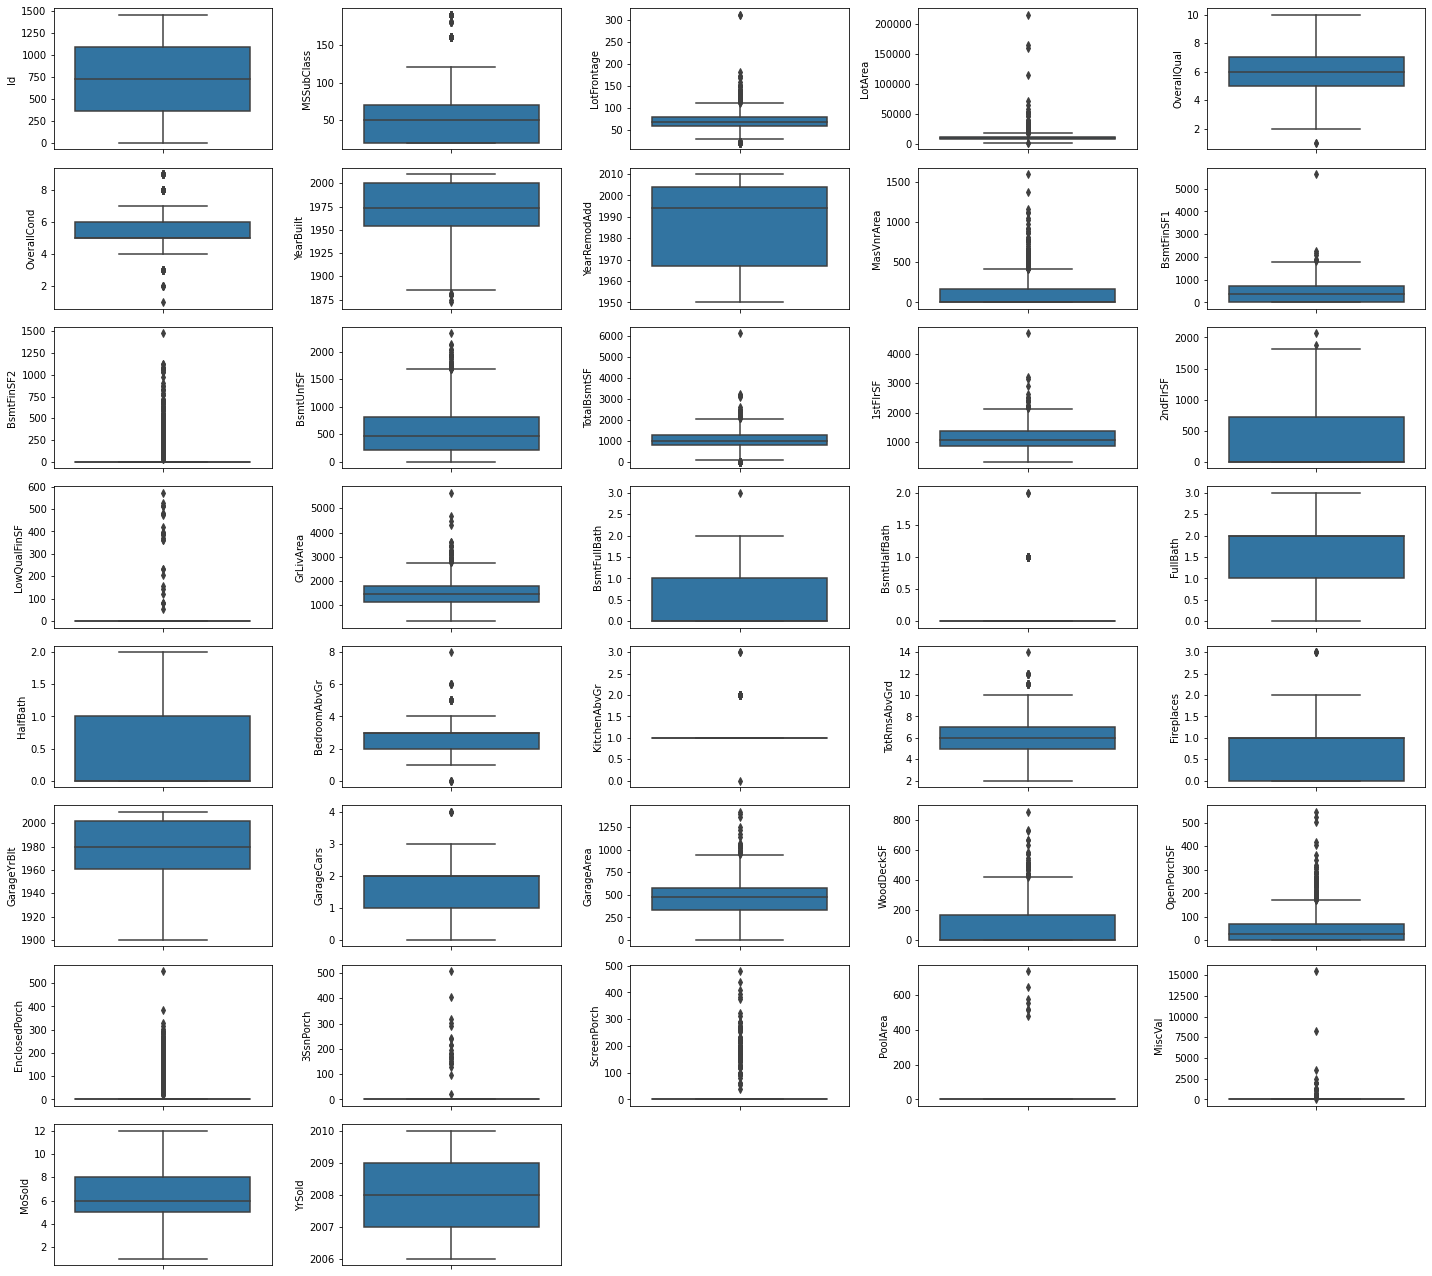

In [13]:
fig = plt.figure(figsize=(20, 20))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

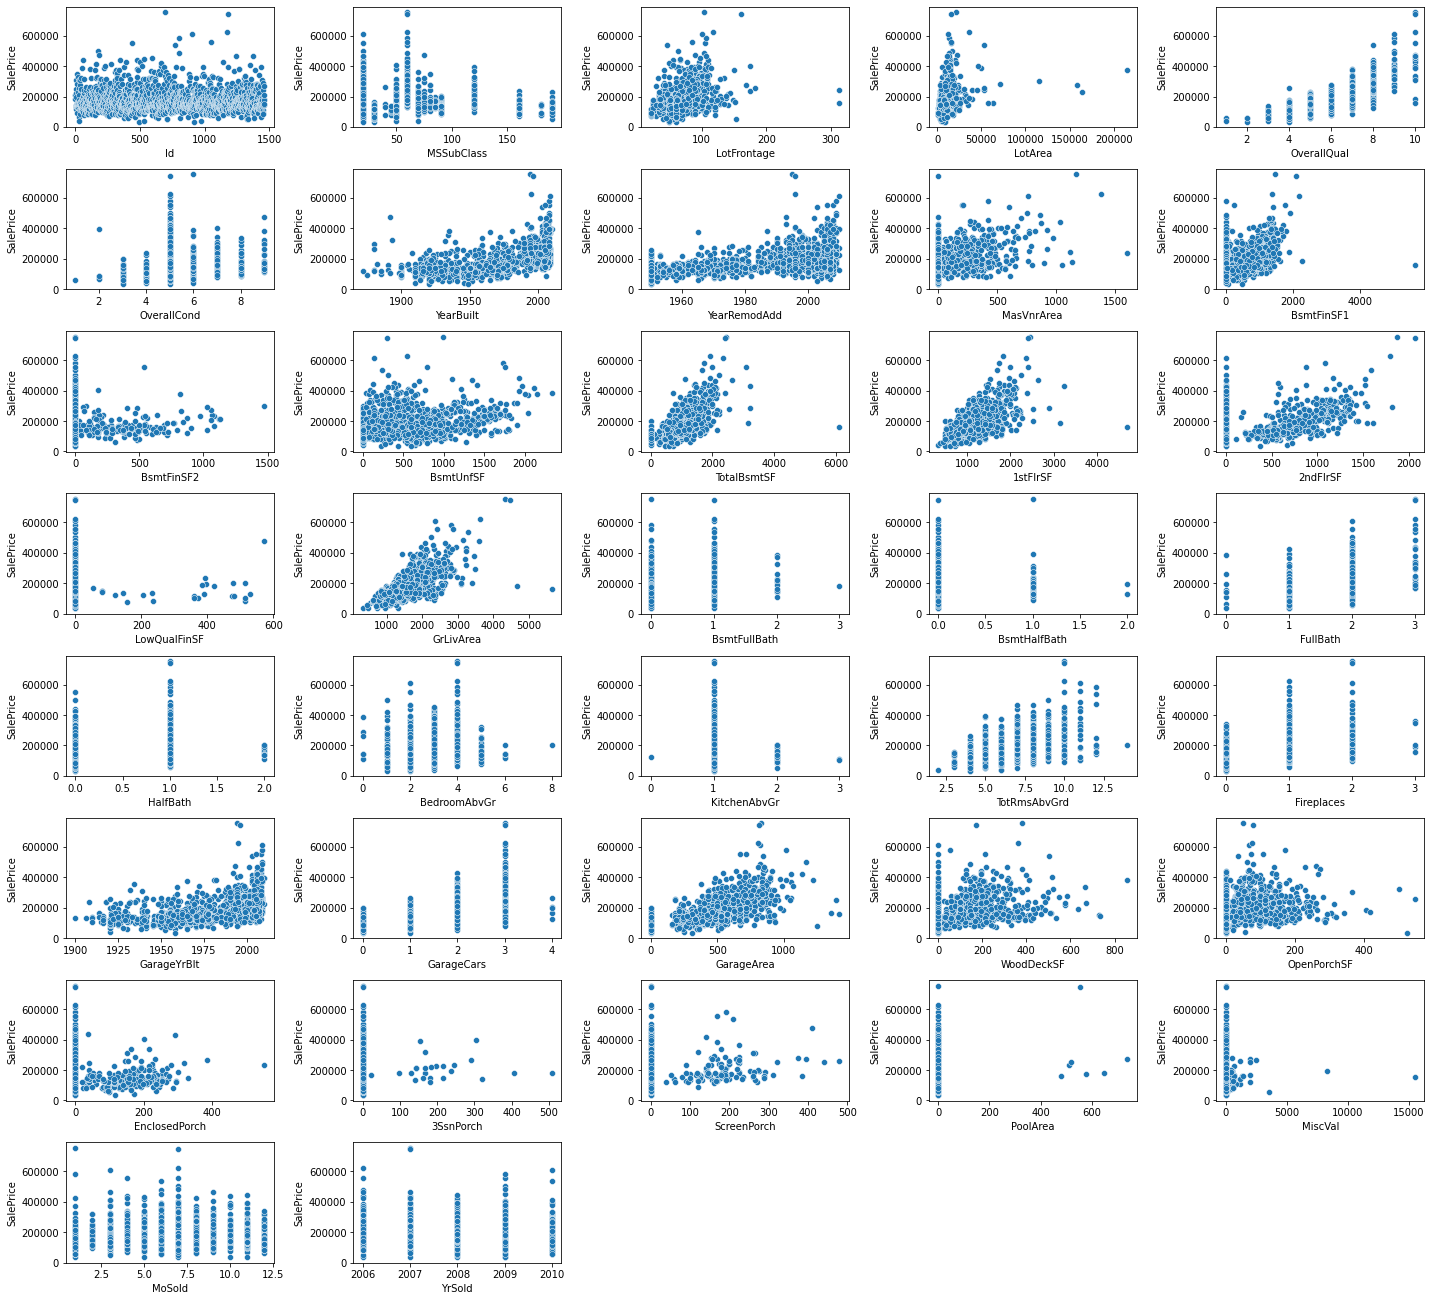

In [14]:
# Bivariate analysis - scatter plots for target versus numerical attributes
f = plt.figure(figsize=(20,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 5, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], target)
    
plt.tight_layout()
plt.show()

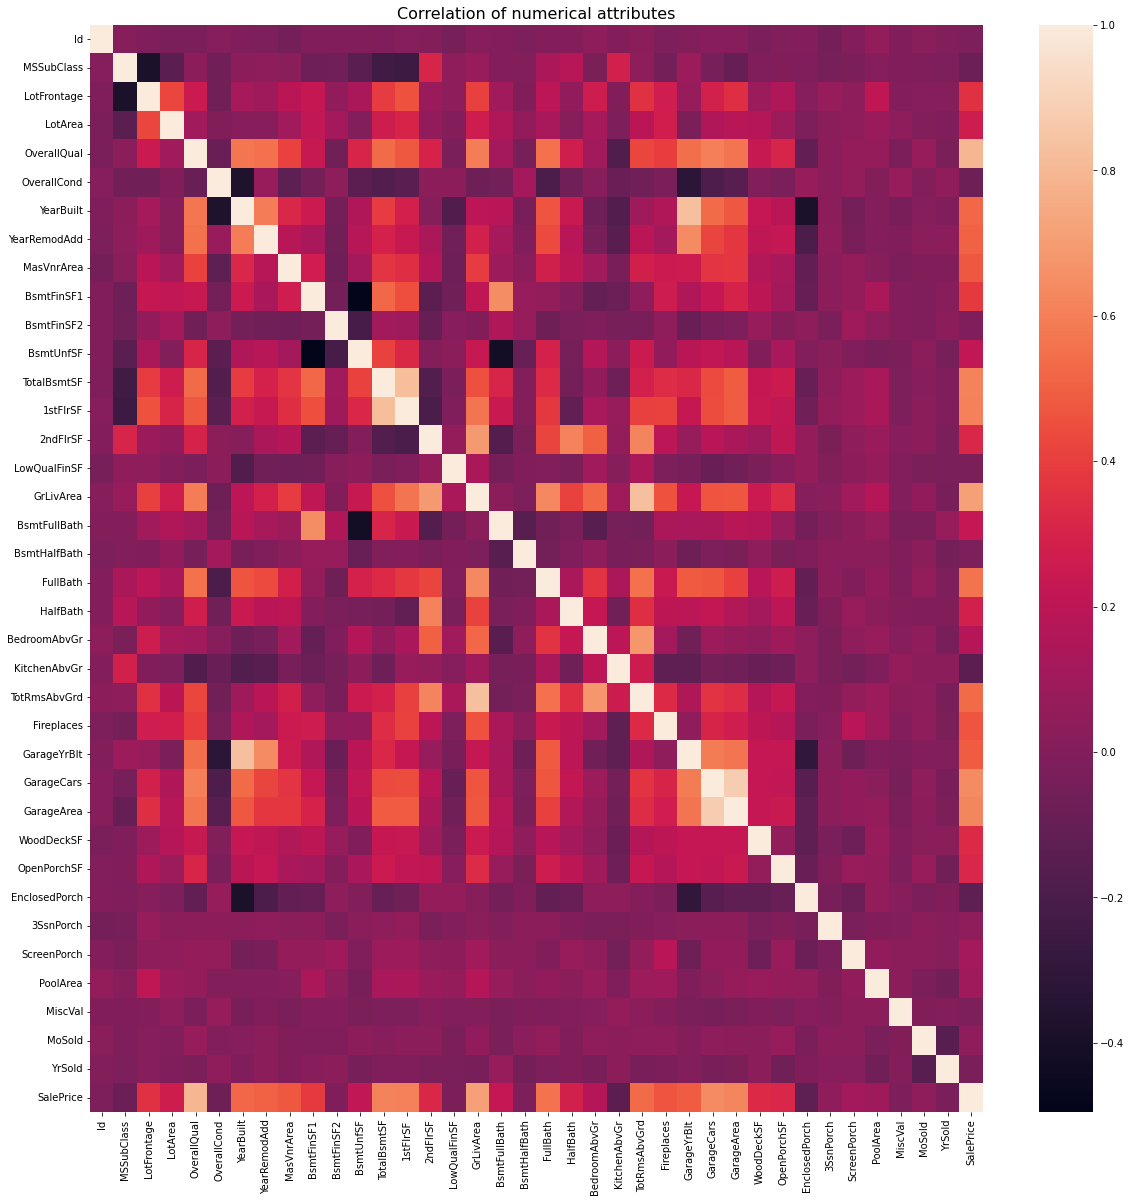

In [15]:
# heatmap of the correlation of the numerical columns:
correlation = df_train.corr()
f, ax = plt.subplots(figsize=(20,20))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [16]:
# With reference to the target, the top correlated attributes are:
correlation[target_name].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

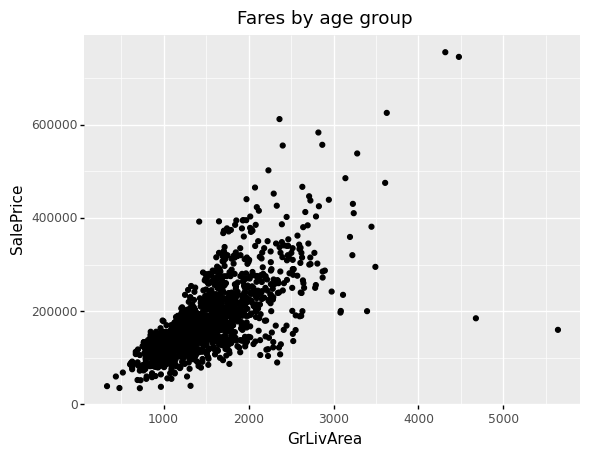

<ggplot: (8744095336313)>

In [17]:
(ggplot(df_train)
 + aes(x='GrLivArea', y='SalePrice')
 + geom_point()
 + ggtitle('Fares by age group')
 + theme(text=element_text(family='NanumBarunGothic'))
)

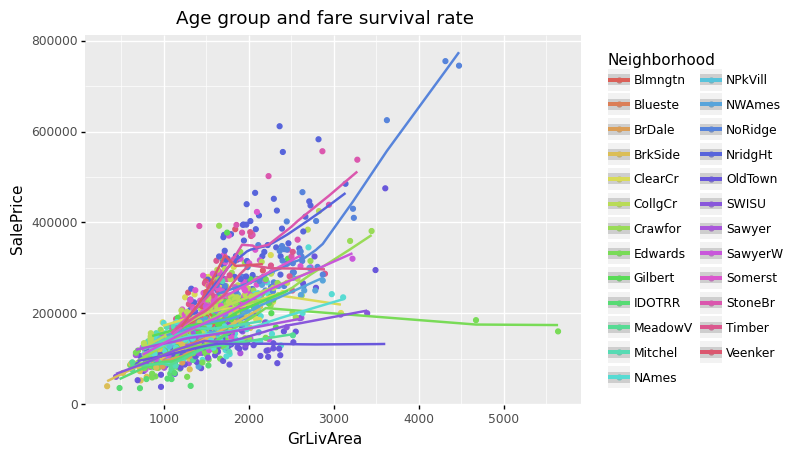

<ggplot: (8744092216685)>

In [18]:
(ggplot(df_train)
 + aes(x='GrLivArea', y='SalePrice', color='Neighborhood')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
 + theme(text=element_text(family='NanumBarunGothic'))
)

![](https://i.postimg.cc/5tJZK310/0x0.jpg)

### If you liked this core, you can also check out my other [works](https://www.kaggle.com/marinchenko/notebooks) and [databases](https://www.kaggle.com/marinchenko/datasets).
In order to learn something, you need to understand all aspects. [Here](https://github.com/BEPb/kaggle_Housing_Prices) on my github [page](https://github.com/BEPb) I have put together a set of code to solve the Titanic competition (jupiter laptop and python code).

I am looking for friends to develop as a machine learning specialist. 
Open to dialogue and criticism. 
### Thank you for your time!
In progress... Will be added

